<h1 style="color: #00BFFF;">00 | Import Libraries</h1>


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Basic Libraries
import os
import json
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Computer Vision
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img

<h1 style="color: #00BFFF;">01 | Data Collection and Exploration</h1>

In [3]:
# Data Path
dataset_path= '/content/drive/MyDrive/IRONHACK/W8/computer_vision_project/data'

In [4]:
# Path for every folder
train_dir = os.path.join(dataset_path, 'train')
test_dir = os.path.join(dataset_path, 'test')
validation_dir = os.path.join(dataset_path, 'val')

In [5]:
# Verify test, train and validation directories
print("Train directory contents:", os.listdir(train_dir))
print("Test directory contents:", os.listdir(test_dir))
print("Validation directory contents:", os.listdir(validation_dir))

Train directory contents: ['fractured', 'not fractured']
Test directory contents: ['fractured', 'not fractured']
Validation directory contents: ['fractured', 'not fractured']


In [6]:
# Check for number of data files for fractured and not fractured
def check_data_files(train_dir, validation_dir, test_dir):
  for directory in [train_dir, validation_dir, test_dir]:
    subdirectory_name = os.path.basename(directory)
    print(f"\n========== Class distribution in {subdirectory_name} ==========")
    for subdirectory in ['fractured', 'not fractured']:
      subdirectory_path = os.path.join(directory, subdirectory)
      num_files = len(os.listdir(subdirectory_path))
      print(f"Number of files in {subdirectory} directory: {num_files}")


In [7]:
# Check for number of data files for fractured and not fractured
check_data_files(train_dir, validation_dir, test_dir)


========== Class distribution in train ==========
Number of files in fractured directory: 4605
Number of files in not fractured directory: 4634

========== Class distribution in val ==========
Number of files in fractured directory: 337
Number of files in not fractured directory: 486

========== Class distribution in test ==========
Number of files in fractured directory: 238
Number of files in not fractured directory: 262


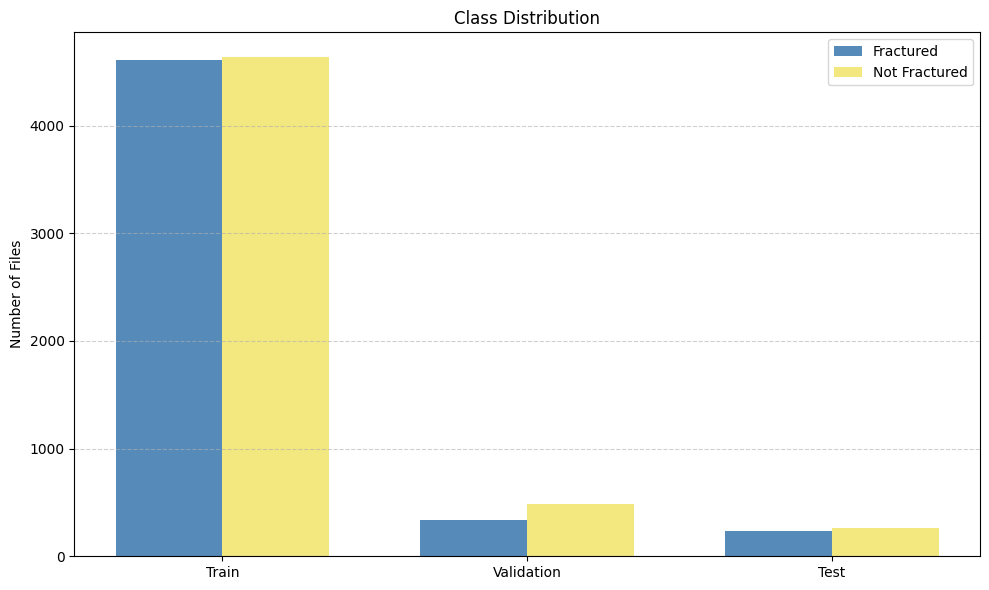

In [10]:
# Dataset splits and corresponding class counts
splits = ['Train', 'Validation', 'Test']
fractured_counts = [4605, 337, 238]
not_fractured_counts = [4634, 486, 262]

x = np.arange(len(splits))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, fractured_counts, width, label='Fractured', color='#568ab9')
plt.bar(x + width/2, not_fractured_counts, width, label='Not Fractured', color='#f3e780')

# Labels and titles
plt.ylabel('Number of Files')
plt.title('Class Distribution')
plt.xticks(x, splits)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### Exploration

In [ ]:
def plot_images_per_class(name_dir, name_images):
  fig, axes = plt.subplots(1, 4, figsize=(10, 8))  # Create a grid with 1 row and 4 columns
  for i, ax in enumerate(axes):
      ax.imshow(load_img(os.path.join(name_dir, name_images[i])))
      ax.axis('off')  # Hide axis for clarity
      ax.set_title(f"Image {i+1}")
  plt.tight_layout()  # Adjust layout to avoid overlap
  plt.show()

In [ ]:
# Showing train sample images
train_fractured_dir = os.path.join(train_dir, 'fractured')
tfract_images = os.listdir(train_fractured_dir)

train_normal_dir = os.path.join(train_dir, 'not fractured')
tnonfract_images = os.listdir(train_normal_dir)

Sample train fractured images:


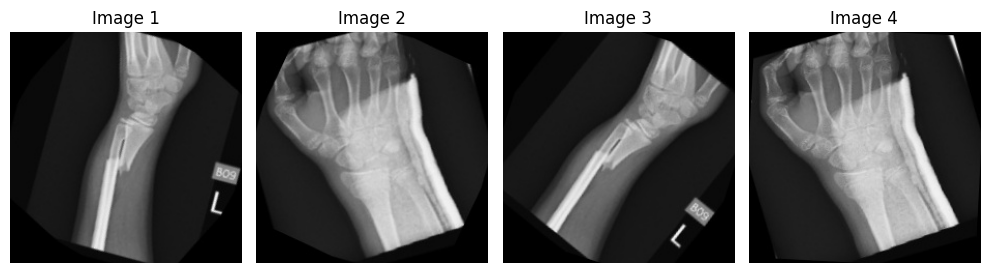


Sample train non-fractured images:


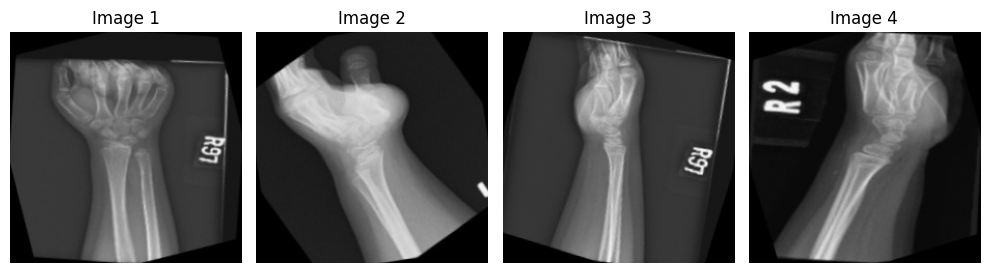

In [ ]:
# Display sample fractured images
print("Sample train fractured images:")
plot_images_per_class(train_fractured_dir, tfract_images)

# Display sample non-fractured images
print("\nSample train non-fractured images:")
plot_images_per_class(train_normal_dir, tnonfract_images)

In [ ]:
# Showing test sample images
test_fractured_dir = os.path.join(test_dir, 'fractured')
test_fract_images = os.listdir(test_fractured_dir)

test_normal_dir = os.path.join(test_dir, 'not fractured')
test_nonfract_images = os.listdir(test_normal_dir)

Sample train fractured images:


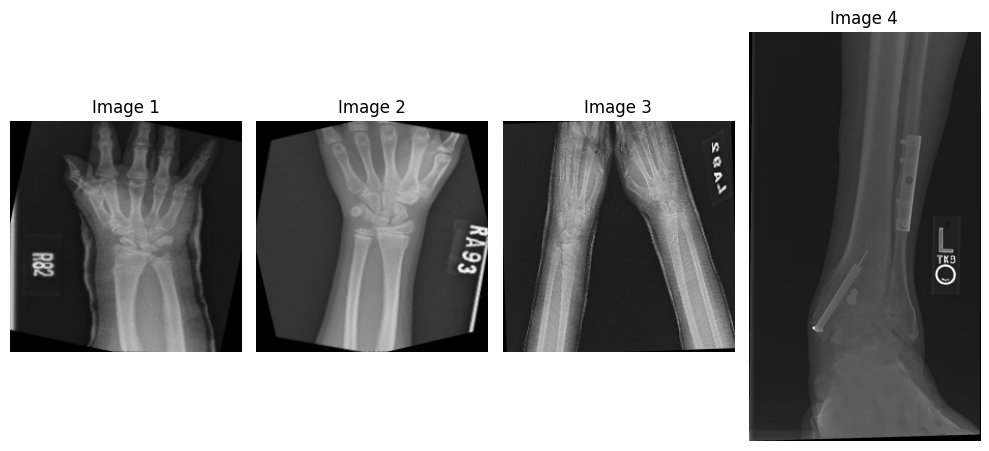


Sample train non-fractured images:


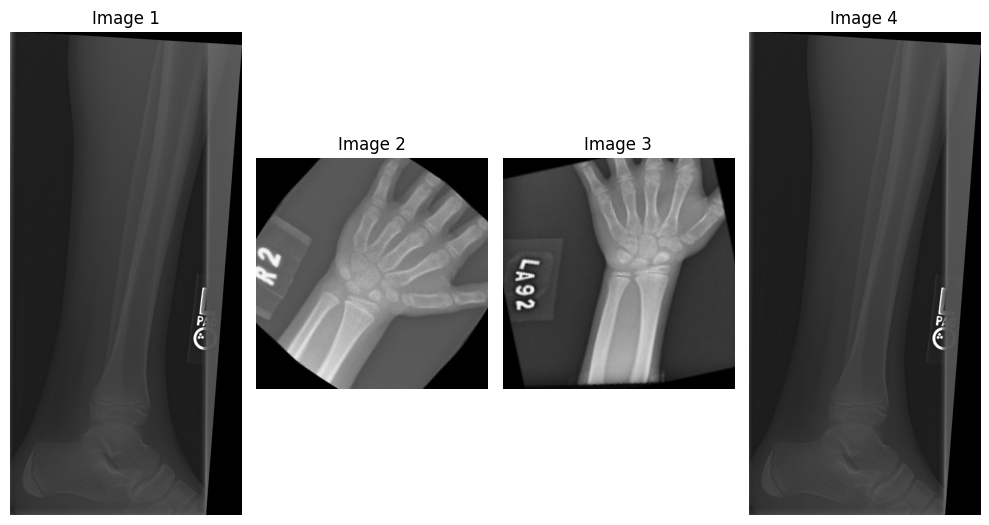

In [ ]:
# Display sample fractured images
print("Sample train fractured images:")
plot_images_per_class(test_fractured_dir, test_fract_images)

# Display sample non-fractured images
print("\nSample train non-fractured images:")
plot_images_per_class(test_normal_dir, test_nonfract_images)